In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
from activ.readfile import load_data
from activ.pipeline import score_clusters_cv, cluster_range, filter_outliers, run_umap
import h5py
from bokeh.plotting import figure, output_file, show
from bokeh.models import CategoricalColorMapper, ColumnDataSource
from bokeh.palettes import Category10, Category20
from bokeh.io import output_notebook
from umap import UMAP
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
filename = '/Users/ahyeon/Desktop/TBIanalysis/data/data.h5'
with h5py.File(filename, 'r') as f:
    data_bm = f['data_matrix_subset_biomarker'][:]
    data_oc = f['data_matrix_subset_outcome'][:]
    feature_bm = f['feature_name_subset_biomarker'][:]
    feature_oc = f['feature_name_subset_outcome'][:]
    pid = f['patient_id'][:]

In [17]:
outcome = np.load('outcome_cv_results.npz')
outcome = outcome['name1']

In [135]:
outcome.shape

(48,)

In [5]:
ranges = np.asarray(range(2,50))

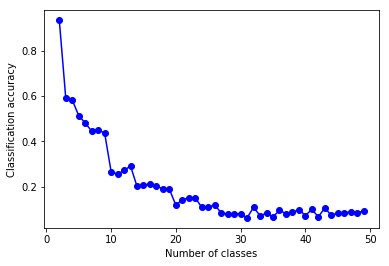

In [6]:
# number of classes vs classification accuracy
plt.figure()
plt.plot(ranges, outcome, 'bo', linestyle = '-')
plt.xlabel('Number of classes')
plt.ylabel('Classification accuracy')
plt.savefig('/Users/ahyeon/Desktop/activ/bin/outcome_plot.pdf')
plt.show()

[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26
 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49]


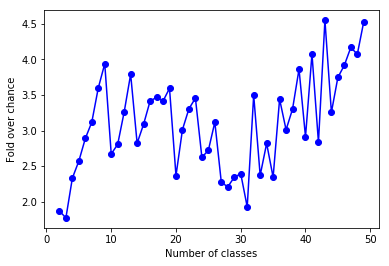

In [7]:
plt.figure()
print(ranges)
plt.plot(ranges, outcome*ranges, 'bo', linestyle = '-')
plt.xlabel('Number of classes')
plt.ylabel('Fold over chance')
# plt.annotate('125 classes', (125, 57.5), fontsize=12)
plt.savefig('/Users/ahyeon/Desktop/activ/bin/outcome_mean_plot.pdf')
plt.show()

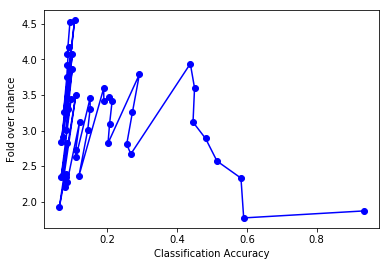

In [8]:
plt.figure()
plt.plot(outcome, outcome*ranges, 'bo', linestyle = '-')
plt.xlabel('Classification Accuracy')
plt.ylabel('Fold over chance')
plt.savefig('/Users/ahyeon/Desktop/activ/bin/acc_vs_norm_acc.pdf')
plt.show()

In [43]:
filtered_outcome = np.load('outcome_cv_filtered_results.npz')

In [44]:
filtered_outcome = filtered_outcome['name1']

In [25]:
new_ranges = np.asarray(range(2,12))

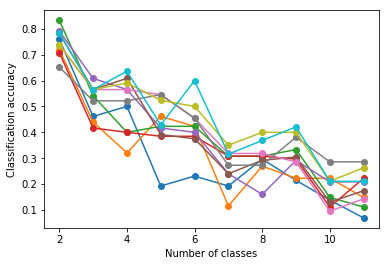

In [26]:
# number of classes vs classification accuracy (filtered)
plt.figure()
plt.plot(new_ranges, filtered_outcome, 'o', linestyle = '-')
plt.xlabel('Number of classes')
plt.ylabel('Classification accuracy')
plt.savefig('/Users/ahyeon/Desktop/activ/bin/outcome_10cv.pdf')
plt.show()

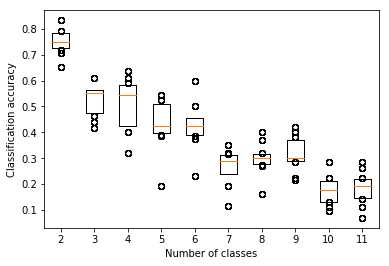

In [27]:
plt.figure()
for x in new_ranges:
    plt.boxplot(filtered_outcome.T, whis=[25,75], positions=new_ranges)
plt.xlabel('Number of classes')
plt.ylabel('Classification accuracy')
plt.savefig('/Users/ahyeon/Desktop/activ/bin/outcome_10cv_boxplot.pdf')
plt.show()

In [101]:
filtered_outcome

array([[ 0.76      ,  0.72      ,  0.83333333,  0.70833333,  0.79166667,
         0.7826087 ,  0.73913043,  0.65217391,  0.73913043,  0.7826087 ],
       [ 0.46153846,  0.44      ,  0.54166667,  0.41666667,  0.60869565,
         0.56521739,  0.56521739,  0.52173913,  0.56521739,  0.56521739],
       [ 0.5       ,  0.32      ,  0.4       ,  0.4       ,  0.56521739,
         0.60869565,  0.56521739,  0.52173913,  0.59090909,  0.63636364],
       [ 0.19230769,  0.46153846,  0.42307692,  0.38461538,  0.41666667,
         0.39130435,  0.54545455,  0.54545455,  0.52380952,  0.42857143],
       [ 0.23076923,  0.42307692,  0.42307692,  0.38461538,  0.4       ,
         0.375     ,  0.45454545,  0.45454545,  0.5       ,  0.6       ],
       [ 0.19230769,  0.11538462,  0.30769231,  0.30769231,  0.24      ,
         0.24      ,  0.31818182,  0.27272727,  0.35      ,  0.31578947],
       [ 0.2962963 ,  0.26923077,  0.30769231,  0.30769231,  0.16      ,
         0.29166667,  0.31818182,  0.27272727

In [113]:
for i in range(10):
    for j in range(10):
        filtered_outcome[i][0]

0.46153846153846156

In [105]:
val = [0.76,0.461538461538,0.5,0.192307692308,0.230769230769,0.192307692308,0.296296296296,0.214285714286,0.137931034483,0.0689655172414]

In [108]:
val = np.asarray(val)

In [109]:
val*new_ranges

array([ 1.52      ,  1.38461538,  2.        ,  0.96153846,  1.38461538,
        1.34615385,  2.37037037,  1.92857143,  1.37931034,  0.75862069])

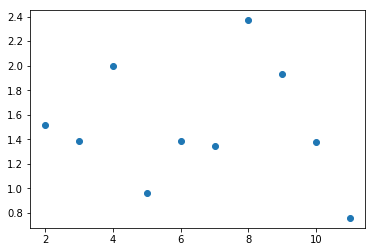

In [111]:
# for x in filtered_outcome:
#     arr = np.asarray(x[0])
#     new = x[0]*new_ranges
# print(arr)
plt.plot(new_ranges, val*new_ranges, 'o')
plt.show()

In [92]:
filtered_outcome[:,1]

array([ 0.72      ,  0.44      ,  0.32      ,  0.46153846,  0.42307692,
        0.11538462,  0.26923077,  0.22222222,  0.22222222,  0.14814815])

In [87]:
for ii, x in enumerate(filtered_outcome):
    print(x[ii])
    new = x[ii]*new_ranges
#     print(new)

0.76
0.44
0.4
0.384615384615
0.4
0.24
0.318181818182
0.380952380952
0.210526315789
0.210526315789


In [55]:
arr = []
for ii,x in enumerate(filtered_outcome):
    new = x[ii]*new_ranges
    arr.append(new)

[array([ 1.52,  2.28,  3.04,  3.8 ,  4.56,  5.32,  6.08,  6.84,  7.6 ,  8.36]), array([ 0.88,  1.32,  1.76,  2.2 ,  2.64,  3.08,  3.52,  3.96,  4.4 ,  4.84]), array([ 0.8,  1.2,  1.6,  2. ,  2.4,  2.8,  3.2,  3.6,  4. ,  4.4]), array([ 0.76923077,  1.15384615,  1.53846154,  1.92307692,  2.30769231,
        2.69230769,  3.07692308,  3.46153846,  3.84615385,  4.23076923]), array([ 0.8,  1.2,  1.6,  2. ,  2.4,  2.8,  3.2,  3.6,  4. ,  4.4]), array([ 0.48,  0.72,  0.96,  1.2 ,  1.44,  1.68,  1.92,  2.16,  2.4 ,  2.64]), array([ 0.63636364,  0.95454545,  1.27272727,  1.59090909,  1.90909091,
        2.22727273,  2.54545455,  2.86363636,  3.18181818,  3.5       ]), array([ 0.76190476,  1.14285714,  1.52380952,  1.9047619 ,  2.28571429,
        2.66666667,  3.04761905,  3.42857143,  3.80952381,  4.19047619]), array([ 0.42105263,  0.63157895,  0.84210526,  1.05263158,  1.26315789,
        1.47368421,  1.68421053,  1.89473684,  2.10526316,  2.31578947]), array([ 0.42105263,  0.63157895,  0.8421

In [66]:
arr = np.stack(arr)
arr

array([[ 1.52      ,  2.28      ,  3.04      ,  3.8       ,  4.56      ,
         5.32      ,  6.08      ,  6.84      ,  7.6       ,  8.36      ],
       [ 0.88      ,  1.32      ,  1.76      ,  2.2       ,  2.64      ,
         3.08      ,  3.52      ,  3.96      ,  4.4       ,  4.84      ],
       [ 0.8       ,  1.2       ,  1.6       ,  2.        ,  2.4       ,
         2.8       ,  3.2       ,  3.6       ,  4.        ,  4.4       ],
       [ 0.76923077,  1.15384615,  1.53846154,  1.92307692,  2.30769231,
         2.69230769,  3.07692308,  3.46153846,  3.84615385,  4.23076923],
       [ 0.8       ,  1.2       ,  1.6       ,  2.        ,  2.4       ,
         2.8       ,  3.2       ,  3.6       ,  4.        ,  4.4       ],
       [ 0.48      ,  0.72      ,  0.96      ,  1.2       ,  1.44      ,
         1.68      ,  1.92      ,  2.16      ,  2.4       ,  2.64      ],
       [ 0.63636364,  0.95454545,  1.27272727,  1.59090909,  1.90909091,
         2.22727273,  2.54545455,  2.86363636

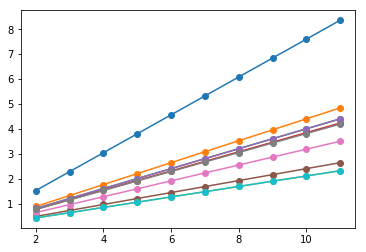

In [82]:
plt.figure()
plt.plot(new_ranges, arr.T,'o', linestyle = '-')
plt.show()

In [80]:
new_filter = np.zeros((10,10))
for x in range(10):
    new_filter[:,x] = filtered_outcome[x]*new_ranges

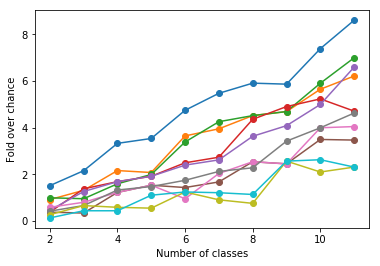

In [81]:
plt.figure()
plt.plot(new_ranges, new_filter, 'o', linestyle = '-')
plt.xlabel('Number of classes')
plt.ylabel('Fold over chance')
plt.savefig('/Users/ahyeon/Desktop/activ/bin/outcome_10cv_norm.pdf')
plt.show()

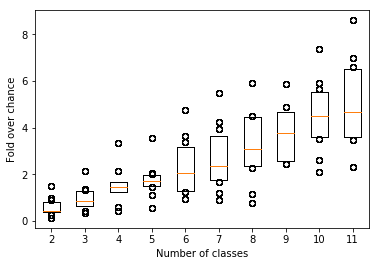

In [17]:
plt.figure()
for x in new_ranges:
    plt.boxplot(new_filter.T, whis=[25,75], positions=new_ranges)
plt.xlabel('Number of classes')
plt.ylabel('Fold over chance')
plt.savefig('/Users/ahyeon/Desktop/activ/bin/outcome_10cv_norm_boxplot.pdf')
plt.show()

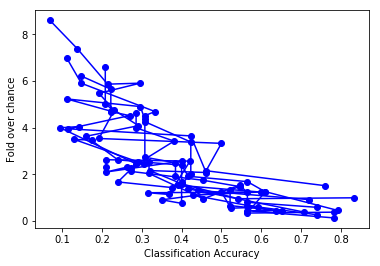

In [74]:
plt.figure()
plt.plot(filtered_outcome, new_filter, 'bo', linestyle = '-')
plt.xlabel('Classification Accuracy')
plt.ylabel('Fold over chance')
plt.savefig('/Users/ahyeon/Desktop/activ/bin/filtered_acc_vs_filtered_norm_acc.pdf')
plt.show()

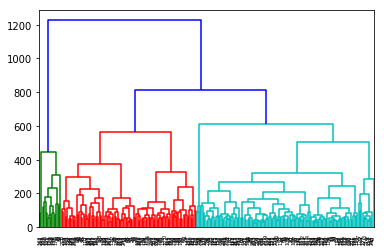

In [115]:
Z = hierarchy.linkage(data_oc.T, 'ward', optimal_ordering=True)
plt.figure()
hierarchy.dendrogram(Z, color_threshold=700)
plt.savefig('/Users/ahyeon/Desktop/activ/bin/dendrogram.pdf')
plt.show()

In [47]:
labels = hierarchy.cut_tree(Z, n_clusters=6).reshape(247)

In [52]:
umap_data = run_umap(data_oc.T, n_neighbors=6, min_dist=0.001)

(237, 2)

In [75]:
targets = ['0', '1', '2', '3', '4', '5']

In [76]:
output_notebook()

Loading BokehJS ...

In [79]:
source = ColumnDataSource(dict(
    x = np.asarray(umap_data[:,0]),
    y = np.asarray(umap_data[:,1]),
    label = [targets[d] for d in labels]  
))
color_mapper = CategoricalColorMapper(factors=targets, 
                                      palette=Category10[6] )
p = figure(title="umap")
p.circle(
    x='x', y='y', radius=0.05, source=source,
    color={'field': 'label', 'transform': color_mapper},
    legend='label')
plt.savefig('/Users/ahyeon/Desktop/activ/bin/umap.pdf')

show(p)

<Figure size 432x288 with 0 Axes>

In [9]:
import scipy.io
w1 = scipy.io.loadmat('/Users/ahyeon/Desktop/TBIanalysis/W1.mat')
h1 = scipy.io.loadmat('/Users/ahyeon/Desktop/TBIanalysis/H1.mat')

In [10]:
weights = w1['W1']
hval = w1['H1']

In [11]:
weights.shape

(237, 13)

In [12]:
def data_normalization(M, method):
    if method == 'z-score':
        data_matrix_normalized = (M-np.mean(M))/np.std(M)
    elif method == 'positive':
        norm_M = M-min(M)
        data_matrix_normalized = norm_M/max(norm_M)

In [13]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import train_test_split, cross_val_score

In [85]:
# test_data = weights, data_bm.T
def umap_pipeline(iteration, test_data):
    umap_dims = np.arange(2,11)
    clusters = np.arange(2,15)
    score = np.zeros((iteration, len(umap_dims), len(clusters), 10))
    norm_score = np.zeros((iteration, len(umap_dims), len(clusters), 10))
    emb = []
    tree = []
    for x in range(iteration):
        embeddings = []
        trees = []
        for ii,k in enumerate(umap_dims): # umap dimension
            embedding = run_umap(data_oc.T, k, n_neighbors=10,min_dist=0.001)
            embeddings.append(embedding)
            Z = hierarchy.linkage(embedding, 'ward', optimal_ordering=True)
            trees.append(Z)
            for jj,c in enumerate(clusters): # cluster
                labels = hierarchy.cut_tree(Z, n_clusters=c).reshape(247)
                score[x,ii,jj] = cross_val_score(RFC(100), test_data, labels, cv=10)
                norm_score[x,ii,jj] = cross_val_score(RFC(100), test_data, np.random.permutation(labels), cv=10)
        emb.append(embeddings)
        tree.append(trees)
    fname = '/Users/ahyeon/Desktop/TBIanalysis/umap_{}_results.mat'.format(test_data)
    with h5py.File(fname, 'w') as f:
        f.create_dataset('score', data=score)
        f.create_dataset('norm_score', data=norm_score)
        f.create_dataset('emb', data=emb)
        f.create_dataset('tree', data=tree)
    return score, norm_score, emb, tree
        
        

In [107]:
score, norm_score, emb, tree = umap_pipeline(50,data_bm.T)

/Users/ahyeon/anaconda3/envs/activ/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/Users/ahyeon/anaconda3/envs/activ/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/Users/ahyeon/anaconda3/envs/activ/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/Users/ahyeon/anaconda3/envs/activ/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: W

/Users/ahyeon/anaconda3/envs/activ/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/Users/ahyeon/anaconda3/envs/activ/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/Users/ahyeon/anaconda3/envs/activ/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/Users/ahyeon/anaconda3/envs/activ/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: W

/Users/ahyeon/anaconda3/envs/activ/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/Users/ahyeon/anaconda3/envs/activ/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/Users/ahyeon/anaconda3/envs/activ/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/Users/ahyeon/anaconda3/envs/activ/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: W

In [ ]:
score, norm_score, emb, tree = umap_pipeline(50,data_bm.T)

In [55]:
# # using weights 
count=0
umap_dims = np.arange(2,11)
clusters = np.arange(2,13)
score = np.zeros((len(umap_dims), len(clusters), 10))
norm_score = np.zeros((len(umap_dims), len(clusters), 10))
embeddings = []
trees = []
for ii,k in enumerate(umap_dims): # umap dimension
    embedding = run_umap(data_oc.T, k, n_neighbors=10, min_dist=0.001)
    embedding_filter, indices = filter_outliers(embedding, 10)
    embeddings.append(embedding_filter)
    Z = hierarchy.linkage(embedding_filter, 'ward', optimal_ordering=True)
    trees.append(Z)
    for jj,c in enumerate(clusters): # cluster
        labels = hierarchy.cut_tree(Z, n_clusters=c).reshape(237)
        score[ii,jj] = cross_val_score(RFC(100), weights, labels, cv=10)
        norm_score[ii,jj] = cross_val_score(RFC(100), weights, np.random.permutation(labels), cv=10)
        count+=1
        print(count)


1
2
3
4
5
6
7
8


/Users/ahyeon/anaconda3/envs/activ/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/Users/ahyeon/anaconda3/envs/activ/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


9


/Users/ahyeon/anaconda3/envs/activ/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/Users/ahyeon/anaconda3/envs/activ/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


10


/Users/ahyeon/anaconda3/envs/activ/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/Users/ahyeon/anaconda3/envs/activ/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43


/Users/ahyeon/anaconda3/envs/activ/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/Users/ahyeon/anaconda3/envs/activ/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


44
45
46
47
48
49
50
51
52
53
54


/Users/ahyeon/anaconda3/envs/activ/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/Users/ahyeon/anaconda3/envs/activ/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75


/Users/ahyeon/anaconda3/envs/activ/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/Users/ahyeon/anaconda3/envs/activ/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


76


/Users/ahyeon/anaconda3/envs/activ/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/Users/ahyeon/anaconda3/envs/activ/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


77
78
79
80
81
82
83
84
85


/Users/ahyeon/anaconda3/envs/activ/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/Users/ahyeon/anaconda3/envs/activ/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


86


/Users/ahyeon/anaconda3/envs/activ/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/Users/ahyeon/anaconda3/envs/activ/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


87


/Users/ahyeon/anaconda3/envs/activ/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/Users/ahyeon/anaconda3/envs/activ/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 7 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


88
89
90
91
92
93
94
95
96
97
98
99


In [56]:
score2 = score/norm_score.mean(axis=-1, keepdims=True)
med_score = np.median(score2, axis=-1)
max_score = np.amax(score2, axis=-1)

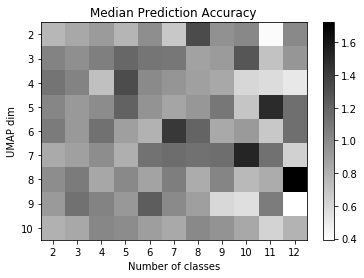

In [73]:
f, ax = plt.subplots(1)
im = ax.imshow(med_score, cmap='gray_r')
f.colorbar(im)
ax.set_xticks(np.arange(len(clusters)))
ax.set_xticklabels(clusters)
ax.set_xlabel('Number of classes')
ax.set_yticks(np.arange(len(umap_dims)))
ax.set_yticklabels(umap_dims)
ax.set_ylabel('UMAP dim')
ax.set_title('Median Prediction Accuracy')
plt.savefig('/Users/ahyeon/Desktop/activ/bin/heatmap.pdf')


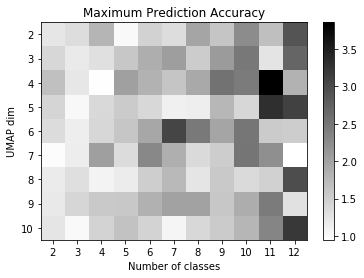

In [74]:
f, ax = plt.subplots(1)
im = ax.imshow(max_score, cmap='gray_r')
f.colorbar(im)
ax.set_xticks(np.arange(len(clusters)))
ax.set_xticklabels(clusters)
ax.set_xlabel('Number of classes')
ax.set_yticks(np.arange(len(umap_dims)))
ax.set_yticklabels(umap_dims)
ax.set_ylabel('UMAP dim')
ax.set_title('Maximum Prediction Accuracy')
plt.savefig('/Users/ahyeon/Desktop/activ/bin/heatmap2.pdf')

/Users/ahyeon/anaconda3/envs/activ/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  # Remove the CWD from sys.path while we load stuff.


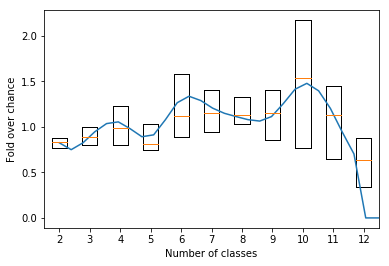

In [75]:
from scipy.interpolate import spline

plt.figure()
for x in clusters:
    plt.boxplot(score2[5].T, whis=[25,75], positions=clusters, sym='')
plt.xlabel('Number of classes')
plt.ylabel('Fold over chance')

xnew = np.linspace(2,14,32) 
power_smooth = spline(clusters,score2[5].mean(axis=1),xnew)
plt.plot(xnew,power_smooth)
plt.savefig('/Users/ahyeon/Desktop/activ/bin/umapboxplot.pdf')

plt.show()

In [82]:
score3=score

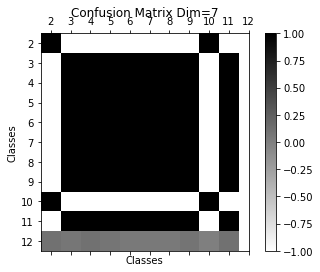

In [84]:
mat_score = score3[5,:,:]

for i in range(len(mat_score)-1):
    for j in range(len(mat_score)-1):
        val0 = mat_score[i]
        val0 = val0 - val0.mean(keepdims=True)
        val0 /= np.linalg.norm(val0,keepdims=True)
        val1 = mat_score[j]
        val1 = val1 - val1.mean(keepdims=True)
        val1 /= np.linalg.norm(val1, keepdims=True)
        x = (val0*val1).sum().mean()
        mat_score[i,j] = x

f, ax = plt.subplots(1)
im = ax.matshow(mat_score, cmap='gray_r')
f.colorbar(im)
ax.set_xticks(np.arange(len(clusters)))
ax.set_xticklabels(clusters)
ax.set_xlabel('Classes')
ax.set_yticks(np.arange(len(clusters)))
ax.set_yticklabels(clusters)
ax.set_ylabel('Classes')
ax.set_title('Confusion Matrix Dim={}'.format(7))
plt.savefig('/Users/ahyeon/Desktop/activ/bin/confusionmatrix.pdf')

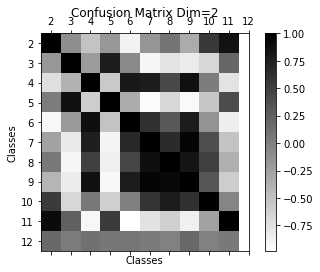

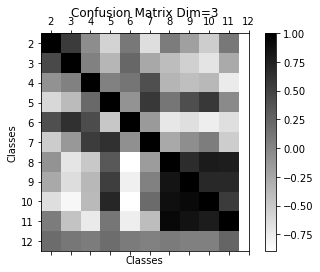

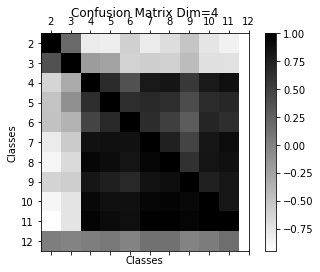

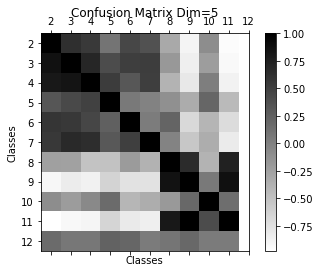

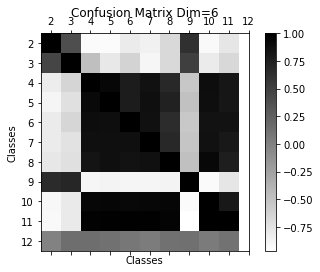

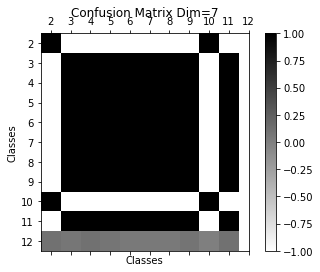

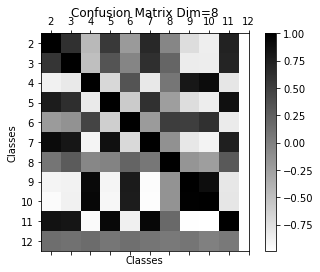

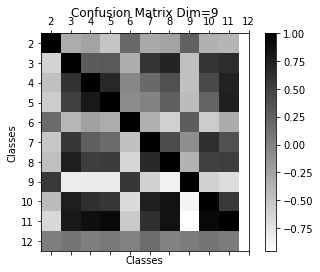

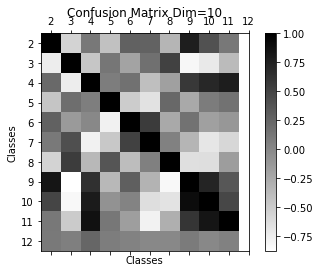

In [78]:
# with PdfPages('plots.pdf') as pdf:
for d in range(len(umap_dims)):
    mat_score = score[d,:,:]
    for i in range(len(mat_score)-1):
        for j in range(len(mat_score)-1):
            val0 = mat_score[i]
            val0 = val0 - val0.mean(keepdims=True)
            val0 /= np.linalg.norm(val0,keepdims=True)
            val1 = mat_score[j]
            val1 = val1 - val1.mean(keepdims=True)
            val1 /= np.linalg.norm(val1, keepdims=True)
            x = (val0*val1).sum().mean()
            mat_score[i,j] = x

    f, ax = plt.subplots(1)
    im = ax.matshow(mat_score, cmap='gray_r')
    f.colorbar(im)
    ax.set_xticks(np.arange(len(clusters)))
    ax.set_xticklabels(clusters)
    ax.set_xlabel('Classes')
    ax.set_yticks(np.arange(len(clusters)))
    ax.set_yticklabels(clusters)
    ax.set_ylabel('Classes')
    ax.set_title('Confusion Matrix Dim={}'.format(d+2))
    if d==4:
        plt.savefig('/Users/ahyeon/Desktop/activ/bin/confusionmatrix.pdf')
        
#         pdf.savefig()  
#         plt.close()
            



/Users/ahyeon/anaconda3/envs/activ/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  """


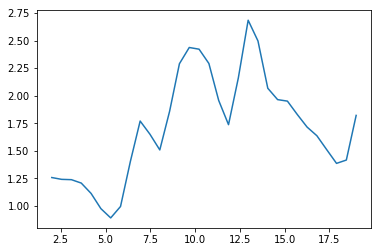

In [299]:
from scipy.interpolate import spline

xnew = np.linspace(2,19,32) #300 represents number of points to make between T.min and T.max

power_smooth = spline(clusters,score[4].mean(axis=1),xnew)

plt.plot(xnew,power_smooth)
plt.show()

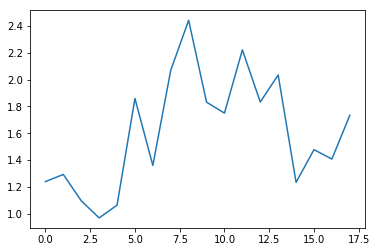

In [265]:
plt.plot(np.median(score[4], axis=-1))

In [212]:
for ii in range(labels.max()+1):
    print(ii, (labels == ii).sum())

0 22
1 19
2 42
3 12
4 22
5 19
6 14
7 27
8 33
9 22
10 15


In [15]:
embedding = run_umap(data_oc.T, 2, n_neighbors=10, min_dist=0.001)
Z = hierarchy.linkage(embedding, 'ward', optimal_ordering=True)
labels = hierarchy.cut_tree(Z, n_clusters=10).reshape(247)
targets = ['1', '2', '3', '4', '5','6','7','8','9','10']
output_notebook()
source = ColumnDataSource(dict(
    x = np.asarray(embedding[:,0]),
    y = np.asarray(embedding[:,1]),
    label = [targets[d] for d in labels]  
))
color_mapper = CategoricalColorMapper(factors=targets, 
                                      palette=Category10[10] )
p = figure(title="UMAP 10 Classes")
p.circle(
    x='x', y='y', radius=0.05, source=source,
    color={'field': 'label', 'transform': color_mapper},
    legend='label')
plt.savefig('/Users/ahyeon/Desktop/activ/bin/umap10.pdf')

show(p)

Loading BokehJS ...

<Figure size 432x288 with 0 Axes>

In [13]:
embedding = run_umap(data_oc.T, 2, n_neighbors=13, min_dist=0.001)
Z = hierarchy.linkage(embedding, 'ward', optimal_ordering=True)
labels = hierarchy.cut_tree(Z, n_clusters=13).reshape(247)
targets = ['1', '2', '3', '4', '5','6','7','8','9','10','11','12','13']
output_notebook()
source = ColumnDataSource(dict(
    x = np.asarray(embedding[:,0]),
    y = np.asarray(embedding[:,1]),
    label = [targets[d] for d in labels]  
))
color_mapper = CategoricalColorMapper(factors=targets, 
                                      palette=Category20[13] )
p = figure(title="UMAP 13 Classes")
p.circle(
    x='x', y='y', radius=0.05, source=source,
    color={'field': 'label', 'transform': color_mapper},
    legend='label')
plt.savefig('/Users/ahyeon/Desktop/activ/bin/umap13.pdf')

show(p)

Loading BokehJS ...

<Figure size 432x288 with 0 Axes>